In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

In [270]:
df = pd.read_csv('taxigov-corridas-7-dias-vF.csv')

In [271]:
df.head()

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,destino_solicitado_endereco,destino_efetivo_endereco,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,ateste_setorial_data,conteste_info
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.62,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,"Centro de Juventude de Samambaia, Brasilia, DF","QUADRA QS 402, SAMAMBAIA, BRASILIA - DF, 72318...",-15.801838,-47.881059,-15.869028,-48.088905,-15.869603,-48.089303,2022-04-07 10:30:05.973,NaN
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.98,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,"Ministerio da Cidadania - GM/MC, Brasilia, DF","EMI BLOCO A, BRASILIA - DF, 70346-090, BRASIL ...",-15.836506,-47.951229,-15.798405,-47.873197,-15.798743,-47.873186,2022-04-06 10:09:04.377,NaN
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.84,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,"Ministerio da Ciencia, Tecnologia e Inovacoes ...","EMI BLOCO B, BRASILIA - DF, 70346-090, BRASIL ...",-15.770219,-47.893141,-15.799863,-47.870052,-15.798648,-47.872254,2022-04-04 13:45:26.670,NaN
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.46,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,"Anexos A e B do Ministerio da Agricultura, Asa...","EM, 4, BRASILIA - DF, 70346-090, BRASIL - BRAS...",-15.798782,-47.954007,-15.800980,-47.871103,-15.801520,-47.871124,2022-04-04 15:38:25.673,NaN
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.15,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,"CENAD, Brasilia, DF","SPO. 15, BRASILIA - DF, 70610-200, BRASIL - BR...",-15.770219,-47.893141,-15.814576,-47.941157,-15.819680,-47.945679,2022-04-04 13:40:10.243,NaN


In [272]:
df.shape

(2837, 26)

In [273]:
df.dtypes

base_origem                      object
qru_corrida                     float64
nome_orgao                       object
status_corrida                   object
motivo_corrida                   object
km_total                        float64
valor_corrida                   float64
data_abertura                    object
data_despacho                    object
data_local_embarque              object
data_inicio                      object
data_final                       object
origem_endereco                  object
origem_bairro                    object
origem_cidade                    object
origem_uf                        object
destino_solicitado_endereco      object
destino_efetivo_endereco         object
origem_latitude                 float64
origem_longitude                float64
destino_solicitado_latitude     float64
destino_solicitado_longitude    float64
destino_efetivo_latitude        float64
destino_efetivo_longitude       float64
ateste_setorial_data             object


In [274]:
df.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,conteste_info
count,2836.00000,2498.000000,2682.000000,2.837000e+03,2837.000000,2.832000e+03,2.830000e+03,2499.000000,2499.000000,0.0
mean,561140.92842,8.940024,25.427696,-2.244235e+03,-47.075693,-4.480527e+03,-6.813433e+03,-17.102245,-47.059593,NaN
std,104386.27541,22.838921,33.473021,5.928162e+04,1.760276,8.387525e+04,1.798821e+05,2.753874,1.776091,NaN
min,223680.00000,0.010000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,NaN
25%,516498.50000,2.310000,6.550000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.836714,-47.890464,NaN
50%,518542.50000,4.827500,13.320000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787215e+01,-15.799758,-47.872354,NaN
75%,520669.75000,10.967500,31.935000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786324e+01,-15.794817,-47.864609,NaN
max,784629.00000,1000.000000,474.040000,-1.561983e+01,-43.065887,-1.561272e+01,-4.296608e+01,-15.619250,-42.966100,NaN


In [275]:
# Como a coluna conteste_info está vazia, ela será deletada

In [276]:
del df["conteste_info"]

In [277]:
df.shape

(2837, 25)

In [278]:
# Substituição do valor vazio da coluna qru_corrida 

In [279]:
df['qru_corrida'].fillna(784630.0, inplace=True)
df.describe() # Para conferir a substituição

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude
count,2837.000000,2498.000000,2682.000000,2.837000e+03,2837.000000,2.832000e+03,2.830000e+03,2499.000000,2499.000000
mean,561219.704970,8.940024,25.427696,-2.244235e+03,-47.075693,-4.480527e+03,-6.813433e+03,-17.102245,-47.059593
std,104452.180382,22.838921,33.473021,5.928162e+04,1.760276,8.387525e+04,1.798821e+05,2.753874,1.776091
min,223680.000000,0.010000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390
25%,516499.000000,2.310000,6.550000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.836714,-47.890464
50%,518543.000000,4.827500,13.320000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787215e+01,-15.799758,-47.872354
75%,520672.000000,10.967500,31.935000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786324e+01,-15.794817,-47.864609
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,-1.561272e+01,-4.296608e+01,-15.619250,-42.966100


In [280]:
# Preenchendo os valores vazios das colunas km_total e valor_corrida

In [281]:
df['km_total'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['km_total'].fillna(0.0, inplace=True)

df['valor_corrida'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['valor_corrida'].fillna(0.0, inplace=True)

In [282]:
df['km_total'].describe()

count    2837.000000
mean        7.871759
std        21.625846
min         0.000000
25%         1.770000
50%         4.090000
75%         9.990000
max      1000.000000
Name: km_total, dtype: float64

In [283]:
df['valor_corrida'].describe()

count    2837.000000
mean       24.038449
std        33.054698
min         0.000000
25%         6.320000
50%        12.720000
75%        30.640000
max       474.040000
Name: valor_corrida, dtype: float64

In [284]:
# Preenchendo os valores vazios das colunas que faltam

In [285]:
df['destino_solicitado_latitude'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['destino_solicitado_latitude'].fillna(0.0, inplace=True)

df['destino_solicitado_longitude'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['destino_solicitado_longitude'].fillna(0.0, inplace=True)

df['destino_efetivo_latitude'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['destino_efetivo_latitude'].fillna(0.0, inplace=True)

df['destino_efetivo_longitude'].replace([np.inf, -np.inf], np.nan, inplace=True) 
df['destino_efetivo_longitude'].fillna(0.0, inplace=True)

In [286]:
df.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000


In [287]:
# Padronizando os dados da coluna motivo_corrida

In [288]:
df.motivo_corrida.unique()

array(['3 - VISITA TECNICA', '1 - REUNIAO EXTERNA', '4 - OUTROS',
       '2 - ENTREGA DE DOCUMENTOS', '02 - Entrega de Documentos',
       '01 - Reunião Externa (Ida/Volta)', '10 - Outros',
       '06 - Inspeção/Fiscalização', '07 - Evento',
       '08 - Atendimento Técnico', '03 - Capacitação/Treinamento',
       '05 - Perícia Médica', '06 Fiscalização',
       '01 Reunião Externa (Ida/Volta)', '04 Outros',
       '02 Entrega de Documentos'], dtype=object)

In [289]:
df.loc[df['motivo_corrida'] == '01 - Reunião Externa (Ida/Volta)', 'motivo_corrida'] = '1 - REUNIAO EXTERNA'
df.loc[df['motivo_corrida'] == '01 Reunião Externa (Ida/Volta)', 'motivo_corrida'] = '1 - REUNIAO EXTERNA'
df.loc[df['motivo_corrida'] == '02 - Entrega de Documentos', 'motivo_corrida'] = '2 - ENTREGA DE DOCUMENTOS'
df.loc[df['motivo_corrida'] == '02 Entrega de Documentos', 'motivo_corrida'] = '2 - ENTREGA DE DOCUMENTOS'
df.loc[df['motivo_corrida'] == '04 Outros', 'motivo_corrida'] = '4 - OUTROS'
df.loc[df['motivo_corrida'] == '05 - Perícia Médica', 'motivo_corrida'] = '5 - PERICIA MEDICA'
df.loc[df['motivo_corrida'] == '06 - Inspeção/Fiscalização', 'motivo_corrida'] = '6 - INSPECAO/FISCALIZACAO'
df.loc[df['motivo_corrida'] == '06 Fiscalização', 'motivo_corrida'] = '6 - INSPECAO/FISCALIZACAO'
df.loc[df['motivo_corrida'] == '07 - Evento', 'motivo_corrida'] = '7 - EVENTO'
df.loc[df['motivo_corrida'] == '08 - Atendimento Técnico', 'motivo_corrida'] = '8 - ATENDIMENTO TECNICO'
df.loc[df['motivo_corrida'] == '03 - Capacitação/Treinamento', 'motivo_corrida'] = '3 - CAPACITACAO/TREINAMENTO'
df.loc[df['motivo_corrida'] == '10 - Outros', 'motivo_corrida'] = '10 - OUTROS'

In [290]:
df.motivo_corrida.unique()

array(['3 - VISITA TECNICA', '1 - REUNIAO EXTERNA', '4 - OUTROS',
       '2 - ENTREGA DE DOCUMENTOS', '10 - OUTROS',
       '6 - INSPECAO/FISCALIZACAO', '7 - EVENTO',
       '8 - ATENDIMENTO TECNICO', '3 - CAPACITACAO/TREINAMENTO',
       '5 - PERICIA MEDICA'], dtype=object)

In [291]:
# Analisando as bases de origem

In [292]:
df.base_origem.unique()

array(['TAXIGOV_DF', 'TAXIGOV_RJ_10', 'TAXIGOV_SP_10'], dtype=object)

In [293]:
# Analisandos os motivos das corridas para cada base de origem

In [294]:
motivos_df_series = df[df.base_origem == 'TAXIGOV_DF'].motivo_corrida.value_counts()
motivos_df_series

1 - REUNIAO EXTERNA          1951
2 - ENTREGA DE DOCUMENTOS     195
4 - OUTROS                    121
3 - VISITA TECNICA             61
Name: motivo_corrida, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

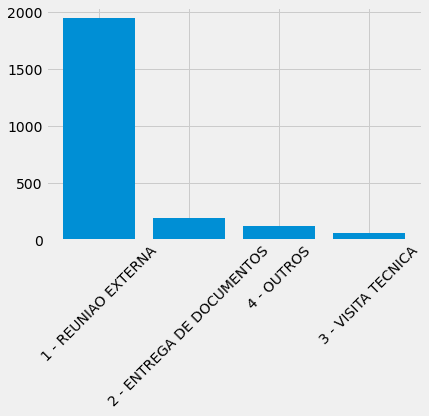

In [295]:
plt.bar(motivos_df_series.keys(), motivos_df_series.array)
plt.xticks(rotation=45)

In [296]:
motivos_rj_series = df[df.base_origem == 'TAXIGOV_RJ_10'].motivo_corrida.value_counts()
motivos_rj_series

10 - OUTROS                    132
1 - REUNIAO EXTERNA            118
2 - ENTREGA DE DOCUMENTOS      100
8 - ATENDIMENTO TECNICO         97
6 - INSPECAO/FISCALIZACAO       23
7 - EVENTO                      12
3 - CAPACITACAO/TREINAMENTO      4
5 - PERICIA MEDICA               1
Name: motivo_corrida, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

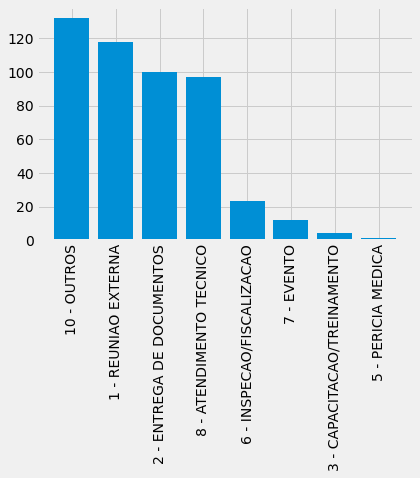

In [297]:
plt.bar(motivos_rj_series.keys(), motivos_rj_series.array)
plt.xticks(rotation=90)

In [298]:
motivos_sp_series = df[df.base_origem == 'TAXIGOV_SP_10'].motivo_corrida.value_counts()
motivos_sp_series

6 - INSPECAO/FISCALIZACAO    11
4 - OUTROS                    5
1 - REUNIAO EXTERNA           4
2 - ENTREGA DE DOCUMENTOS     2
Name: motivo_corrida, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

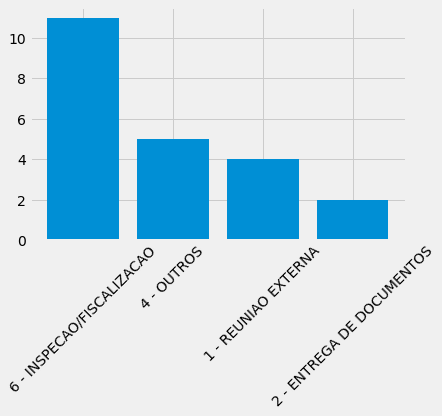

In [299]:
plt.bar(motivos_sp_series.keys(), motivos_sp_series.array)
plt.xticks(rotation=45)

In [300]:
# Importando a planilha "preco-km-rodado.xlsx"

In [301]:
df_preco_km = pd.read_excel('preco-km-rodado.xlsx')

In [302]:
df_preco_km.head()

,Cidade,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,Data da informação
0,AGUAS LINDAS DE GOIAS,2.85,3.66,5.24,31.72,"Considerado igual a Brasília, por falta de loc..."
1,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016
2,DUQUE DE CAXIAS,2.90,3.48,5.90,36.54,"Considerado igual ao Rio de Janeiro, por falta..."
3,FUNDAO,2.90,3.48,5.90,36.54,"Considerado igual ao Rio de Janeiro, por falta..."
4,GUARULHOS,3.42,4.45,5.35,NaN,29/12/2015


In [303]:
# Padronizando a coluna origem_cidade de df para não ter nome diferente da mesma cidade

In [304]:
df.origem_cidade.unique()

array(['BRASILIA', 'BRASÍLIA', 'NOVO GAMA', 'LUZIANIA',
       'VALPARAISO DE GOIAS', 'AGUAS LINDAS DE GOIAS', 'RIO DE JANEIRO',
       'DUQUE DE CAXIAS', 'RJ', 'Rio de Janeiro', nan, 'SEROPEDICA',
       'NITEROI', 'PETROPOLIS', 'JAPERI', 'SAO JOAO DE MERITI',
       'Duque de Caxias', 'ITAGUAI', 'TRES RIOS', 'FUNDAO', 'Niterói',
       'São Caetano do Sul', 'ITAPECERICA DA SERRA', 'São Paulo',
       'SAO PAULO', 'GUARULHOS'], dtype=object)

In [305]:
df.loc[df['origem_cidade'] == 'BRASÍLIA', 'origem_cidade'] = 'BRASILIA'
df.loc[df['origem_cidade'] == 'RJ', 'origem_cidade'] = 'RIO DE JANEIRO'
df.loc[df['origem_cidade'] == 'Rio de Janeiro', 'origem_cidade'] = 'RIO DE JANEIRO'
df.loc[df['origem_cidade'] == 'Duque de Caxias', 'origem_cidade'] = 'DUQUE DE CAXIAS'
df.loc[df['origem_cidade'] == 'Niterói', 'origem_cidade'] = 'NITEROI'
df.loc[df['origem_cidade'] == 'São Caetano do Sul', 'origem_cidade'] = 'SAO CAETANO DO SUL'
df.loc[df['origem_cidade'] == 'São Paulo', 'origem_cidade'] = 'SAO PAULO'

In [306]:
df.origem_cidade.unique()

array(['BRASILIA', 'NOVO GAMA', 'LUZIANIA', 'VALPARAISO DE GOIAS',
       'AGUAS LINDAS DE GOIAS', 'RIO DE JANEIRO', 'DUQUE DE CAXIAS', nan,
       'SEROPEDICA', 'NITEROI', 'PETROPOLIS', 'JAPERI',
       'SAO JOAO DE MERITI', 'ITAGUAI', 'TRES RIOS', 'FUNDAO',
       'SAO CAETANO DO SUL', 'ITAPECERICA DA SERRA', 'SAO PAULO',
       'GUARULHOS'], dtype=object)

In [307]:
# Unindo os dois dataframes

In [308]:
df_merged = pd.merge(df, df_preco_km, how='left', left_on='origem_cidade', right_on='Cidade')

In [309]:
df_merged.head()

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,ateste_setorial_data,Cidade,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,Data da informação
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.62,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,-48.088905,-15.869603,-48.089303,2022-04-07 10:30:05.973,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.98,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,-47.873197,-15.798743,-47.873186,2022-04-06 10:09:04.377,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.84,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,-47.870052,-15.798648,-47.872254,2022-04-04 13:45:26.670,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.46,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,-47.871103,-15.801520,-47.871124,2022-04-04 15:38:25.673,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.15,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,-47.941157,-15.819680,-47.945679,2022-04-04 13:40:10.243,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016


In [310]:
df_merged.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2817.000000,2817.000000,2817.000000,2814.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916,2.867977,3.641700,5.352066,32.600792
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631,0.101806,0.151982,0.247818,2.278813
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,2.600000,3.120000,5.240000,29.150000
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106,2.850000,3.660000,5.240000,31.720000
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955,2.850000,3.660000,5.240000,31.720000
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100,2.850000,3.660000,5.240000,31.720000
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,5.200000,6.850000,49.000000


In [311]:
# Preenhcer os campos vazios das colunas R$/km (bandeira 1), R$/km (bandeira 2), Bandeirada e Tarifa horária com a média

In [312]:
df_merged['R$/km (bandeira 1)'].fillna(2.867977, inplace=True)
df_merged['R$/km (bandeira 2)'].fillna(3.641700, inplace=True)
df_merged['Bandeirada'].fillna(5.352066, inplace=True)
df_merged['Tarifa horária'].fillna(32.600792, inplace=True)

In [313]:
# Cálculo do R$/km descontando a bandeirada

In [314]:
# se km_total = 0 -> valor_por_km_desc_band = 110 (valor acima dos demais que mostrará que é um valor discrepante)
# não posso preencher com a média, por exemplo, pois perderá a informação que procuro

In [315]:
for i in range(2837):
    if (df_merged.loc[i, 'km_total'] == 0):
        df_merged.loc[i, 'valor_por_km_desc_band'] = 110
    else:
        df_merged.loc[i, 'valor_por_km_desc_band'] = (df_merged.loc[i, 'valor_corrida'] - df_merged.loc[i, 'Bandeirada']) / df_merged.loc[i, 'km_total']

In [316]:
df_merged.head()

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,destino_efetivo_latitude,destino_efetivo_longitude,ateste_setorial_data,Cidade,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,Data da informação,valor_por_km_desc_band
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.62,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,-15.869603,-48.089303,2022-04-07 10:30:05.973,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.989223
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.98,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,-15.798743,-47.873186,2022-04-06 10:09:04.377,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.722871
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.84,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,-15.798648,-47.872254,2022-04-04 13:45:26.670,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.260274
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.46,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,-15.801520,-47.871124,2022-04-04 15:38:25.673,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.738363
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.15,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,-15.819680,-47.945679,2022-04-04 13:40:10.243,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.691480


In [317]:
# Cálculo da diferença do R$/km pago no TáxiGov e o R$/km cobrado pelos táxis em cada cidade na bandeira 1

In [318]:
df_merged['dif_valorKM_band1'] = df_merged['valor_por_km_desc_band'] - df_merged['R$/km (bandeira 1)']

In [319]:
# Gráfico do R$/km calculado descontada a bandeirada e o R$/km cobrado pelos táxis

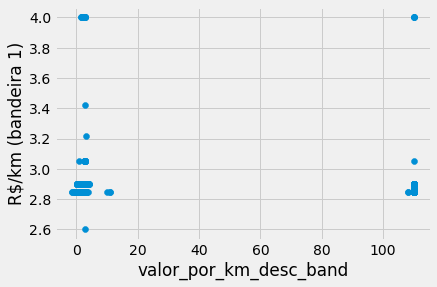

In [320]:
plt.scatter(df_merged['valor_por_km_desc_band'], df_merged['R$/km (bandeira 1)'])
plt.ylabel('R$/km (bandeira 1)')
plt.xlabel('valor_por_km_desc_band')
plt.show()

In [321]:
# Eliminando o ponto mais discrepante para enxergar melhor os demais

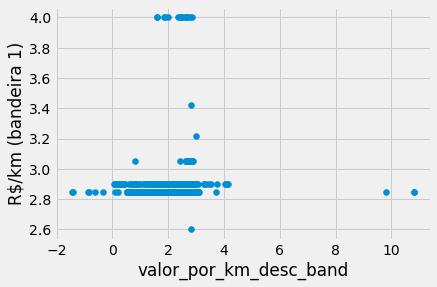

In [322]:
filter_vKM = df_merged[(df_merged.valor_por_km_desc_band < 20)]
plt.scatter(filter_vKM['valor_por_km_desc_band'], filter_vKM['R$/km (bandeira 1)'])
plt.ylabel('R$/km (bandeira 1)')
plt.xlabel('valor_por_km_desc_band')
plt.show()

In [323]:
# Cálculo da distância usando as coordenadas de origem e de destino

In [324]:
# vectorized haversine function (obtido em: 
# https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows)
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [325]:
df_merged['dist_coords'] = haversine(df_merged.origem_latitude, df_merged.origem_longitude, 
                                     df_merged.destino_efetivo_latitude, df_merged.destino_efetivo_longitude)

In [326]:
df_merged.head()

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,ateste_setorial_data,Cidade,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,Data da informação,valor_por_km_desc_band,dif_valorKM_band1,dist_coords
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.62,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,2022-04-07 10:30:05.973,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.989223,0.139223,23.516740
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.98,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,2022-04-06 10:09:04.377,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.722871,-0.127129,9.345818
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.84,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,2022-04-04 13:45:26.670,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.260274,-0.589726,3.871426
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.46,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,2022-04-04 15:38:25.673,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.738363,-0.111637,8.873182
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.15,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,2022-04-04 13:40:10.243,BRASILIA,2.85,3.66,5.24,31.72,17/03/2016,2.691480,-0.158520,7.864339


In [327]:
df_merged.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,valor_por_km_desc_band,dif_valorKM_band1,dist_coords
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916,2.867977,3.641700,5.352066,32.600792,14.880842,12.012866,671.886213
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631,0.101447,0.151445,0.246943,2.269554,35.169159,35.168186,1802.755606
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,2.600000,3.120000,5.240000,29.150000,-1.447368,-4.297368,0.003284
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106,2.850000,3.660000,5.240000,31.720000,1.257246,-1.611905,1.288710
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955,2.850000,3.660000,5.240000,31.720000,2.225979,-0.647445,3.946969
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100,2.850000,3.660000,5.240000,31.720000,2.758410,-0.097857,9.266712
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,5.200000,6.850000,49.000000,110.000000,107.150000,7760.565699


In [328]:
# Cálculo da diferença entre a quilometragem total registrada e a distância obtida pelas coordenadas

In [329]:
df_merged['dif_distancias'] = df_merged['km_total'] - df_merged['dist_coords']

In [330]:
# Gráfico dist_coords e km_total

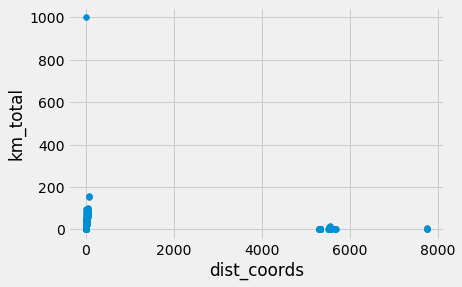

In [331]:
plt.scatter(df_merged['dist_coords'], df_merged['km_total'])
plt.ylabel('km_total')
plt.xlabel('dist_coords')
plt.show()

In [332]:
# Eliminando os pontos mais discrepantes para enxergar melhor os demais

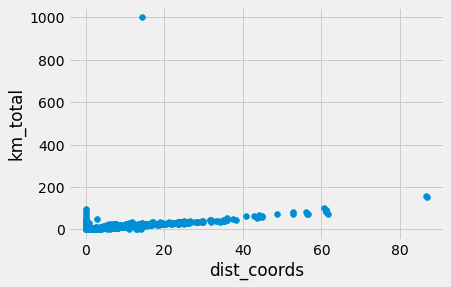

In [333]:
filter_dist = df_merged[(df_merged.dist_coords < 1000)]
plt.scatter(filter_dist['dist_coords'], filter_dist['km_total'])
plt.ylabel('km_total')
plt.xlabel('dist_coords')
plt.show()

In [334]:
# Gráfico das diferenças de distância e de R$/km

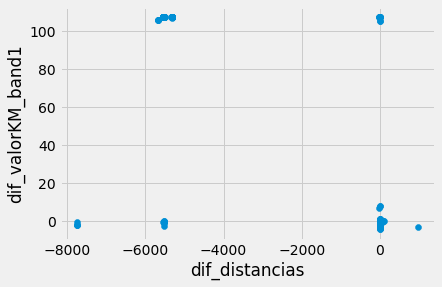

In [335]:
plt.scatter(df_merged['dif_distancias'], df_merged['dif_valorKM_band1'])
plt.ylabel('dif_valorKM_band1')
plt.xlabel('dif_distancias')
plt.show()

In [336]:
# Eliminando os pontos mais discrepantes para enxergar melhor os demais

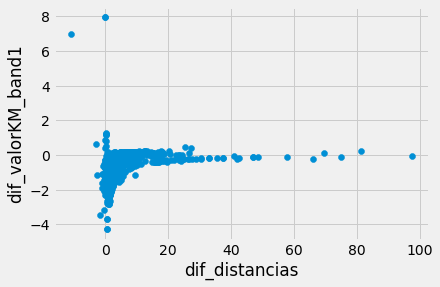

In [337]:
filter_difs = df_merged[(df_merged.dif_distancias > -100) & (df_merged.dif_distancias < 200) 
                        & (df_merged.dif_valorKM_band1 < 20)]
plt.scatter(filter_difs['dif_distancias'], filter_difs['dif_valorKM_band1'])
plt.ylabel('dif_valorKM_band1')
plt.xlabel('dif_distancias')
plt.show()

In [338]:
# Criar coluna da % da dif_distancias em relação ao km_total
# se km_total = 0 -> perc_dif_dist = 1000 (valor acima dos demais que mostrará que é um valor discrepante)

In [339]:
for i in range(2837):
    if (df_merged.loc[i, 'km_total'] == 0):
        df_merged.loc[i, 'perc_dif_dist'] = 1000
    else:
        df_merged.loc[i, 'perc_dif_dist'] = (df_merged.loc[i, 'dif_distancias'] / df_merged.loc[i, 'km_total'])*100

In [340]:
df_merged.head()

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,Data da informação,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.62,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,2.85,3.66,5.24,31.72,17/03/2016,2.989223,0.139223,23.516740,7.103260,23.198105
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.98,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,2.85,3.66,5.24,31.72,17/03/2016,2.722871,-0.127129,9.345818,2.634182,21.988166
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.84,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,2.85,3.66,5.24,31.72,17/03/2016,2.260274,-0.589726,3.871426,1.968574,33.708459
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.46,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,2.85,3.66,5.24,31.72,17/03/2016,2.738363,-0.111637,8.873182,3.586818,28.786664
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.15,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,2.85,3.66,5.24,31.72,17/03/2016,2.691480,-0.158520,7.864339,3.285661,29.467812


In [341]:
df_merged.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916,2.867977,3.641700,5.352066,32.600792,14.880842,12.012866,671.886213,-664.014454,-650.015143
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631,0.101447,0.151445,0.246943,2.269554,35.169159,35.168186,1802.755606,1805.666486,16859.466658
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,2.600000,3.120000,5.240000,29.150000,-1.447368,-4.297368,0.003284,-7759.415699,-674731.799885
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106,2.850000,3.660000,5.240000,31.720000,1.257246,-1.611905,1.288710,0.571033,26.535655
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955,2.850000,3.660000,5.240000,31.720000,2.225979,-0.647445,3.946969,1.326216,37.094219
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100,2.850000,3.660000,5.240000,31.720000,2.758410,-0.097857,9.266712,2.975122,53.660844
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,5.200000,6.850000,49.000000,110.000000,107.150000,7760.565699,985.713036,1000.000000


In [342]:
# Novo gráfico com dif_valorKM_band1 e perc_dif_dist

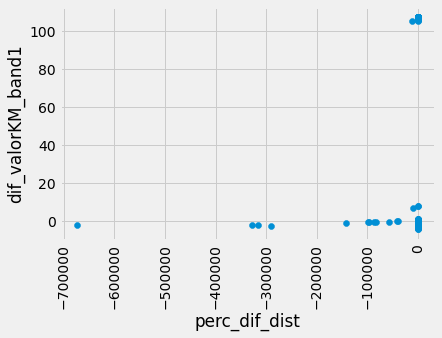

In [421]:
plt.scatter(df_merged['perc_dif_dist'], df_merged['dif_valorKM_band1'])
plt.ylabel('dif_valorKM_band1')
plt.xlabel('perc_dif_dist')
plt.xticks(rotation=90)
plt.show()

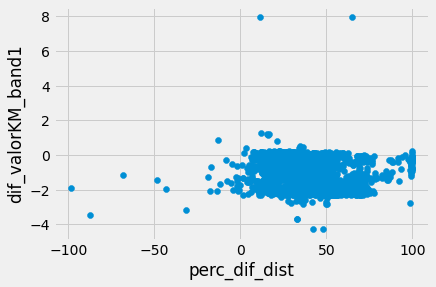

In [344]:
filter_difs_perc = df_merged[(df_merged.perc_dif_dist > -100) & (df_merged.dif_valorKM_band1 < 20)]
plt.scatter(filter_difs_perc['perc_dif_dist'], filter_difs_perc['dif_valorKM_band1'])
plt.ylabel('dif_valorKM_band1')
plt.xlabel('perc_dif_dist')
plt.show()

In [345]:
# Cálculo da duração da corrida

In [346]:
df_merged['tempo_corrida'] = pd.to_datetime(df_merged['data_final']) - pd.to_datetime(df_merged['data_inicio'])
t1 = pd.to_datetime(df_merged['data_final'])
t2 = pd.to_datetime(df_merged['data_inicio'])
df_merged['minutos_corrida'] = (df_merged['tempo_corrida']).astype('timedelta64[m]')

In [347]:
df_merged.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist,tempo_corrida,minutos_corrida
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2778,2778.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916,2.867977,3.641700,5.352066,32.600792,14.880842,12.012866,671.886213,-664.014454,-650.015143,0 days 00:14:35.009530597,14.086033
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631,0.101447,0.151445,0.246943,2.269554,35.169159,35.168186,1802.755606,1805.666486,16859.466658,0 days 00:17:38.944299355,17.642760
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,2.600000,3.120000,5.240000,29.150000,-1.447368,-4.297368,0.003284,-7759.415699,-674731.799885,-1 days +23:52:03.323000,-8.000000
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106,2.850000,3.660000,5.240000,31.720000,1.257246,-1.611905,1.288710,0.571033,26.535655,0 days 00:05:36.192750,5.000000
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955,2.850000,3.660000,5.240000,31.720000,2.225979,-0.647445,3.946969,1.326216,37.094219,0 days 00:09:45.105500,9.000000
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100,2.850000,3.660000,5.240000,31.720000,2.758410,-0.097857,9.266712,2.975122,53.660844,0 days 00:17:39.512250,17.000000
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,5.200000,6.850000,49.000000,110.000000,107.150000,7760.565699,985.713036,1000.000000,0 days 06:26:44.804000,386.000000


In [348]:
# Os valores vazios de tempo_corrida e minutos_corrida são por falta de alguma informação, então eles serão preenchidos 
# por zero para mostrar que a informação está faltando

In [349]:
df_merged['tempo_corrida'].fillna(0.0, inplace=True)
df_merged['minutos_corrida'].fillna(0.0, inplace=True)

In [350]:
df_merged.describe()

,qru_corrida,km_total,valor_corrida,origem_latitude,origem_longitude,destino_solicitado_latitude,destino_solicitado_longitude,destino_efetivo_latitude,destino_efetivo_longitude,R$/km (bandeira 1),R$/km (bandeira 2),Bandeirada,Tarifa horária,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist,minutos_corrida
count,2837.000000,2837.000000,2837.000000,2.837000e+03,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,561219.704970,7.871759,24.038449,-2.244235e+03,-47.075693,-4.472630e+03,-6.796622e+03,-15.064684,-41.452916,2.867977,3.641700,5.352066,32.600792,14.880842,12.012866,671.886213,-664.014454,-650.015143,13.793091
std,104452.180382,21.625846,33.054698,5.928162e+04,1.760276,8.380149e+04,1.796603e+05,6.114409,15.338631,0.101447,0.151445,0.246943,2.269554,35.169159,35.168186,1802.755606,1805.666486,16859.466658,17.573657
min,223680.000000,0.000000,0.000000,-1.579626e+06,-48.289545,-1.581422e+06,-4.787247e+06,-23.652500,-48.276390,2.600000,3.120000,5.240000,29.150000,-1.447368,-4.297368,0.003284,-7759.415699,-674731.799885,-8.000000
25%,516499.000000,1.770000,6.320000,-1.582977e+01,-47.890239,-1.583636e+01,-4.789034e+01,-15.818363,-47.886106,2.850000,3.660000,5.240000,31.720000,1.257246,-1.611905,1.288710,0.571033,26.535655,5.000000
50%,518543.000000,4.090000,12.720000,-1.579953e+01,-47.872008,-1.579962e+01,-4.787210e+01,-15.799231,-47.869955,2.850000,3.660000,5.240000,31.720000,2.225979,-0.647445,3.946969,1.326216,37.094219,9.000000
75%,520672.000000,9.990000,30.640000,-1.579482e+01,-47.861970,-1.579500e+01,-4.786203e+01,-15.788780,-43.252100,2.850000,3.660000,5.240000,31.720000,2.758410,-0.097857,9.266712,2.975122,53.660844,17.000000
max,784630.000000,1000.000000,474.040000,-1.561983e+01,-43.065887,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,5.200000,6.850000,49.000000,110.000000,107.150000,7760.565699,985.713036,1000.000000,386.000000


In [351]:
# Avaliar se as corridas de maior km, maior duração e de maior valor têm R$/km menor

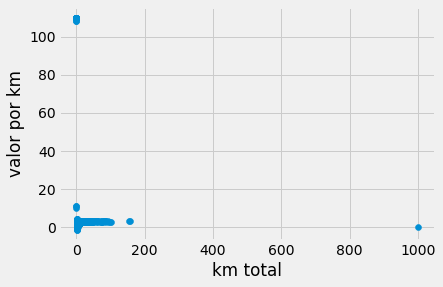

In [352]:
plt.scatter(df_merged['km_total'], df_merged['valor_por_km_desc_band'])
plt.ylabel('valor por km')
plt.xlabel('km total')
plt.show()

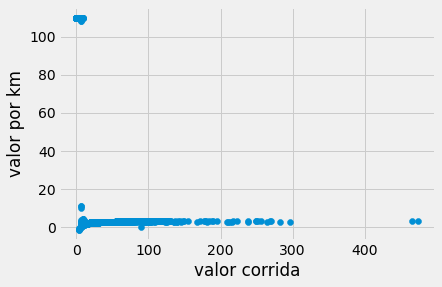

In [353]:
plt.scatter(df_merged['valor_corrida'], df_merged['valor_por_km_desc_band'])
plt.ylabel('valor por km')
plt.xlabel('valor corrida')
plt.show()

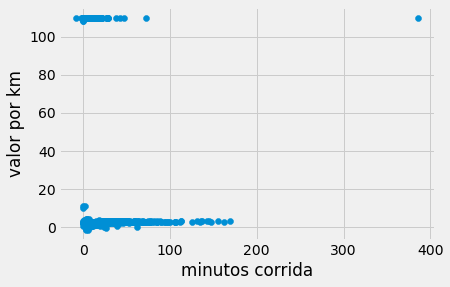

In [354]:
plt.scatter(df_merged['minutos_corrida'], df_merged['valor_por_km_desc_band'])
plt.ylabel('valor por km')
plt.xlabel('minutos corrida')
plt.show()

In [355]:
# Gráfico para avaliar a relação entre os valores de km_total, valor_corrida e minutos_corrida

Text(0.5, 0, 'minutos_corrida')

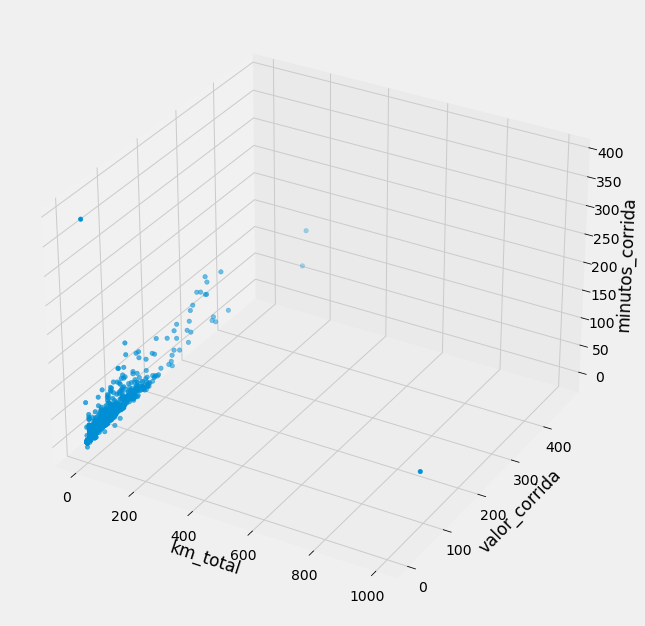

In [356]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')
xline = df_merged['km_total']
yline = df_merged['valor_corrida']
zline = df_merged['minutos_corrida']
ax.scatter3D(xline, yline, zline)
ax.set_xlabel('km_total')
ax.set_ylabel('valor_corrida')
ax.set_zlabel('minutos_corrida')

In [357]:
# Gráfico de minutos_corrida por valor_corrida

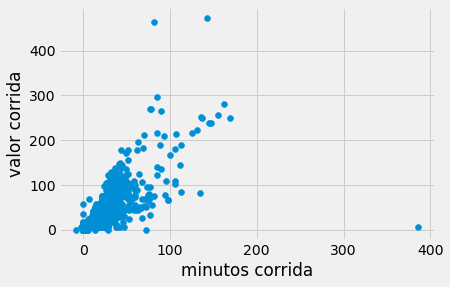

In [358]:
plt.scatter(df_merged['minutos_corrida'], df_merged['valor_corrida'])
plt.ylabel('valor corrida')
plt.xlabel('minutos corrida')
plt.show()

In [359]:
# Gráfico de minutos_corrida por km_total

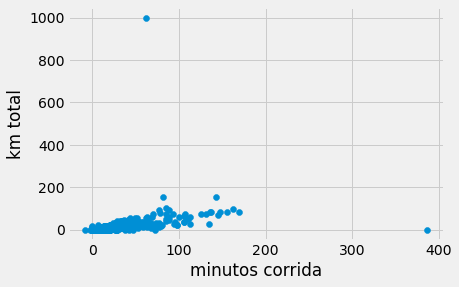

In [360]:
plt.scatter(df_merged['minutos_corrida'], df_merged['km_total'])
plt.ylabel('km total')
plt.xlabel('minutos corrida')
plt.show()

In [361]:
# Gráfico de km_total por valor_corrida

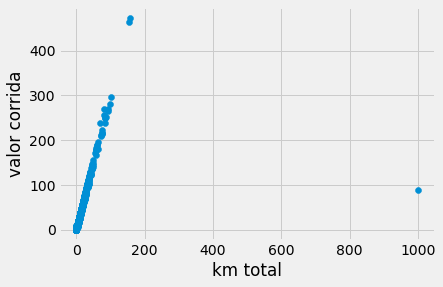

In [362]:
plt.scatter(df_merged['km_total'], df_merged['valor_corrida'])
plt.ylabel('valor corrida')
plt.xlabel('km total')
plt.show()

In [365]:
# Aplicação do algoritmo K-means nos dados obtidos pelas colunas dif_distancias e dif_valorKM_band1

In [366]:
# Primeiramente, os dados serão colocados em escalas mais próximas com RobustScaler

In [367]:
from sklearn.preprocessing import RobustScaler

In [368]:
filter_difs_rs = df_merged[(df_merged.dif_distancias > -100) & (df_merged.dif_distancias < 200) 
                        & (df_merged.dif_valorKM_band1 < 20)]

In [369]:
array_difs_rs = filter_difs_rs[['dif_distancias', 'dif_valorKM_band1']].to_numpy()

In [370]:
transformer = RobustScaler().fit(array_difs_rs)

In [371]:
transform = transformer.transform(array_difs_rs)

Text(0.5, 0, 'dif_distancias')

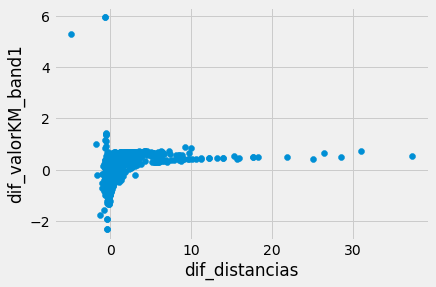

In [372]:
plt.scatter(transform[:,0], transform[:,1])
plt.ylabel('dif_valorKM_band1')
plt.xlabel('dif_distancias')

In [373]:
# Aplicação do algoritmo K-means

In [374]:
from sklearn.cluster import KMeans

In [375]:
# Definição do nº de clusters pelo Método do Cotovelo

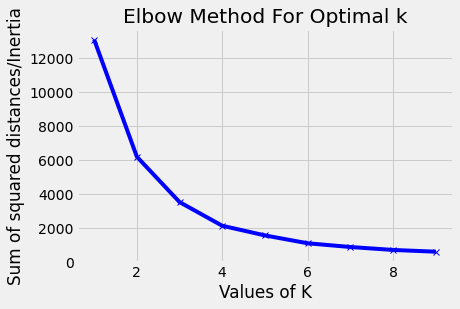

In [376]:
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(transform)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [377]:
# Aplicação do K-means com 4 clusters

Text(0, 0.5, 'dif_valorKM_band1')

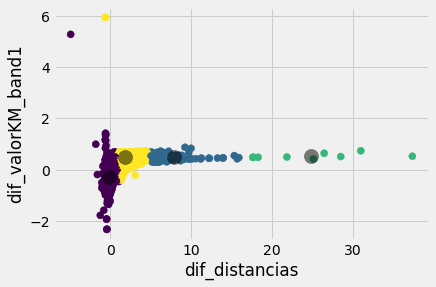

In [378]:
model_k_4 = KMeans(4)
model_k_4.fit(transform)
y_model_k_4 = model_k_difs_4.predict(transform)

plt.scatter(transform[:, 0], transform[:, 1], c=y_model_k_4, s=50, cmap='viridis')

centers = model_k_4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('dif_distancias') 
plt.ylabel('dif_valorKM_band1') 

In [379]:
# Aplicação do K-means com 5 clusters

Text(0, 0.5, 'dif_valorKM_band1')

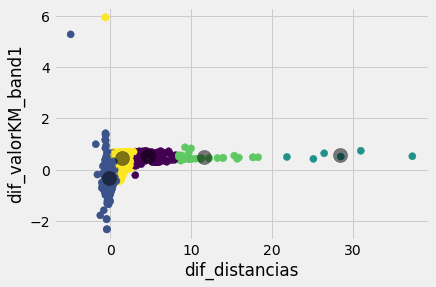

In [380]:
model_k_5 = KMeans(5)
model_k_5.fit(transform)
y_model_k_5 = model_k_5.predict(transform)

plt.scatter(transform[:, 0], transform[:, 1], c=y_model_k_5, s=50, cmap='viridis')

centers = model_k_5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('dif_distancias') 
plt.ylabel('dif_valorKM_band1') 

In [382]:
# Aplicação do algoritmo DBSCAN 

In [383]:
from sklearn.cluster import DBSCAN

In [384]:
from sklearn.neighbors import NearestNeighbors

In [385]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(transform)
distances, indices = nbrs.kneighbors(transform)

(-0.31897752690222864, 0.6)

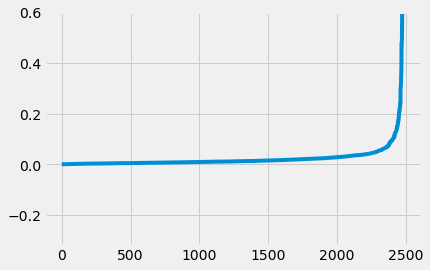

In [386]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(top=0.6)

Text(0, 0.5, 'dif_valorKM_band1')

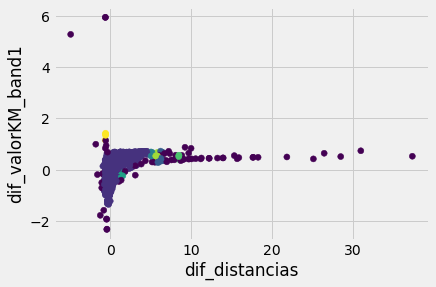

In [387]:
model_db = DBSCAN(eps=0.2)
model_db.fit(transform)
plt.scatter(transform[:,0], transform[:,1], c=model_db.labels_)
plt.xlabel('dif_distancias') 
plt.ylabel('dif_valorKM_band1') 

In [388]:
# Aplicação do algoritmo HDBSCAN 

In [389]:
import hdbscan

In [390]:
clusters_sizes = []
num_outliers = []

for k in range (2,50):
 clusterer = hdbscan.HDBSCAN(min_cluster_size=k)
 clusterer.fit(transform)
 clusters_sizes.append(len(set(clusterer.labels_)))
 num_outliers.append(sum(clusterer.labels_ == -1))

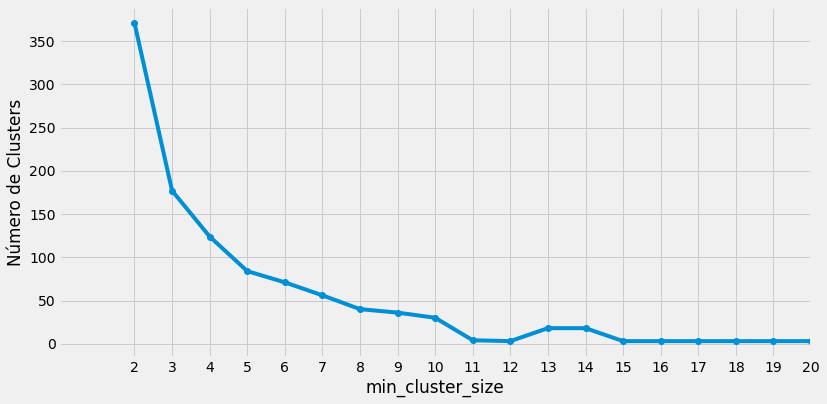

In [391]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
plt.plot(range(2, 50), clusters_sizes, marker='o')
plt.xticks(range(2, 50))
plt.xlabel("min_cluster_size")
plt.ylabel("Número de Clusters")
plt.xlim(0,20)
plt.show()

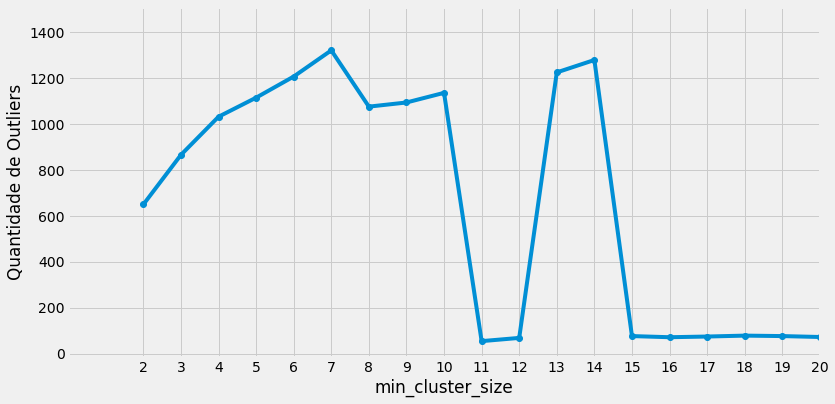

In [392]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
plt.plot(range(2, 50), num_outliers, marker='o')
plt.xticks(range(2, 50))
plt.xlabel("min_cluster_size")
plt.ylabel("Quantidade de Outliers")
plt.xlim(0,20)
plt.show()

Text(0, 0.5, 'dif_valorKM_band1')

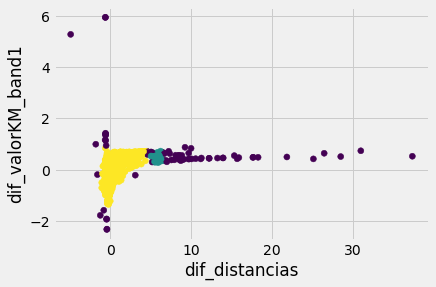

In [393]:
model_hdb = hdbscan.HDBSCAN(min_cluster_size=16)
model_hdb.fit(transform)
plt.scatter(transform[:,0], transform[:,1], c=model_hdb.labels_)
plt.xlabel('dif_distancias') 
plt.ylabel('dif_valorKM_band1') 

In [394]:
# Análise dos resultados

In [395]:
# Criar df com outliers (considerando o resultado com HDBSCAN)

In [396]:
# Criar coluna HDBSCAN_labels

In [397]:
df_merged['HDBSCAN_labels'] = 0.0

In [398]:
# Os valores discrepantes que foram retirados do array na análise já são claramente outliers
# Então esses registros serão preenchidos por -1

In [399]:
filter_outliers = df_merged[(df_merged.dif_distancias < -100) | (df_merged.dif_distancias > 200) 
                        | (df_merged.dif_valorKM_band1 > 20)]

In [400]:
filter_outliers

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,Tarifa horária,Data da informação,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist,tempo_corrida,minutos_corrida,HDBSCAN_labels
5,TAXIGOV_DF,514624.0,Ministério da Infraestrutura,CANCELADA,1 - REUNIAO EXTERNA,0.0,6.32,2022-03-31 08:16:26.723,2022-03-31 08:18:00.900,NaN,...,31.720000,17/03/2016,110.0,107.150000,5555.698040,-5555.698040,1000.0,0 days 00:06:11.477000,6.0,0.0
29,TAXIGOV_DF,514722.0,Ministério da Infraestrutura,CANCELADA,1 - REUNIAO EXTERNA,0.0,0.00,2022-03-31 09:02:38.380,2022-03-31 09:02:53.053,NaN,...,31.720000,17/03/2016,110.0,107.150000,5537.030960,-5537.030960,1000.0,0 days 00:01:28.867000,1.0,0.0
37,TAXIGOV_DF,514745.0,Ministério da Economia,CANCELADA,1 - REUNIAO EXTERNA,0.0,0.00,2022-03-31 09:13:36.963,2022-03-31 09:13:47.560,NaN,...,31.720000,17/03/2016,110.0,107.150000,5537.296156,-5537.296156,1000.0,0 days 00:03:46.820000,3.0,0.0
42,TAXIGOV_DF,514757.0,MAPA - Ministério da Agricultura - Pecuária e ...,CANCELADA,1 - REUNIAO EXTERNA,0.0,6.32,2022-03-31 09:18:14.800,2022-03-31 09:18:39.160,2022-03-31 09:28:16.613,...,31.720000,17/03/2016,110.0,107.150000,5538.221852,-5538.221852,1000.0,0 days 00:20:09.743000,20.0,0.0
49,TAXIGOV_DF,514773.0,Ministério da Economia,CANCELADA,2 - ENTREGA DE DOCUMENTOS,0.0,0.00,2022-03-31 09:23:07.270,2022-03-31 09:26:53.120,NaN,...,31.720000,17/03/2016,110.0,107.150000,5537.579090,-5537.579090,1000.0,0 days 00:00:07.063000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,TAXIGOV_RJ_10,783029.0,2000-21 FIOCRUZ,CANCELADA,1 - REUNIAO EXTERNA,0.0,0.00,2022-04-01 15:01:25.330,2022-04-01 15:01:25.330,NaN,...,32.600792,NaN,110.0,107.132023,5320.117980,-5320.117980,1000.0,0,0.0,0.0
2815,TAXIGOV_SP_10,224681.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.0,0.00,2022-04-05 19:15:13.647,2022-04-06 07:15:00.000,NaN,...,49.000000,"Considerado igual a São Paulo, por falta de lo...",110.0,106.000000,5675.381112,-5675.381112,1000.0,0,0.0,0.0
2817,TAXIGOV_SP_10,224858.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.0,0.00,2022-04-06 13:50:35.983,2022-04-06 15:00:00.000,NaN,...,49.000000,02/04/2022,110.0,106.000000,5678.813463,-5678.813463,1000.0,0,0.0,0.0
2828,TAXIGOV_SP_10,224687.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.0,0.00,2022-04-05 19:27:59.690,2022-04-06 07:15:00.000,NaN,...,49.000000,02/04/2022,110.0,106.000000,5675.380119,-5675.380119,1000.0,0,0.0,0.0


In [401]:
df_merged['HDBSCAN_labels'] = np.where((df_merged.dif_distancias < -100) | (df_merged.dif_distancias > 200) 
                        | (df_merged.dif_valorKM_band1 > 20), -(1.0), df_merged['HDBSCAN_labels'])

In [402]:
df_merged['HDBSCAN_labels'].unique()

array([ 0., -1.])

In [403]:
count = df_merged[df_merged.HDBSCAN_labels == -1.0].HDBSCAN_labels.value_counts()
count

-1.0    354
Name: HDBSCAN_labels, dtype: int64

In [404]:
filter_not_outliers = df_merged[(df_merged.dif_distancias > -100) & (df_merged.dif_distancias < 200) 
                        & (df_merged.dif_valorKM_band1 < 20)]

In [405]:
filter_not_outliers

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,Tarifa horária,Data da informação,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist,tempo_corrida,minutos_corrida,HDBSCAN_labels
0,TAXIGOV_DF,514588.0,Ministério da Economia,CONCLUÍDA,3 - VISITA TECNICA,30.620,96.77,2022-03-31 07:16:12.600,2022-03-31 07:16:21.943,2022-03-31 07:18:46.727,...,31.72,17/03/2016,2.989223,0.139223,23.516740,7.103260,23.198105,0 days 00:36:39.400000,36.0,0.0
1,TAXIGOV_DF,514592.0,Ministério Cidadania,CONCLUÍDA,1 - REUNIAO EXTERNA,11.980,37.86,2022-03-31 07:27:43.707,2022-03-31 07:29:11.167,2022-03-31 07:46:46.910,...,31.72,17/03/2016,2.722871,-0.127129,9.345818,2.634182,21.988166,0 days 00:14:22.290000,14.0,0.0
2,TAXIGOV_DF,514612.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,5.840,18.44,2022-03-31 08:07:01.683,2022-03-31 08:07:14.303,2022-03-31 08:09:47.083,...,31.72,17/03/2016,2.260274,-0.589726,3.871426,1.968574,33.708459,0 days 00:13:16.996000,13.0,0.0
3,TAXIGOV_DF,514616.0,MAPA - Ministério da Agricultura - Pecuária e ...,CONCLUÍDA,1 - REUNIAO EXTERNA,12.460,39.36,2022-03-31 08:10:56.283,2022-03-31 08:11:50.220,2022-03-31 08:16:10.520,...,31.72,17/03/2016,2.738363,-0.111637,8.873182,3.586818,28.786664,0 days 00:18:43.426000,18.0,0.0
4,TAXIGOV_DF,514623.0,MINISTERIO DO DESENVOLVIMENTO REGIONAL,CONCLUÍDA,1 - REUNIAO EXTERNA,11.150,35.25,2022-03-31 08:16:05.157,2022-03-31 08:16:48.130,2022-03-31 08:20:47.950,...,31.72,17/03/2016,2.691480,-0.158520,7.864339,3.285661,29.467812,0 days 00:21:40.283000,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,TAXIGOV_SP_10,224864.0,ANAC,CONCLUÍDA,6 - INSPECAO/FISCALIZACAO,16.411,49.23,2022-04-06 14:03:59.237,2022-04-06 15:05:00.000,2022-04-06 15:00:03.000,...,49.00,02/04/2022,2.664676,-1.335324,13.253004,3.157996,19.243166,0 days 00:38:58,38.0,0.0
2833,TAXIGOV_SP_10,224551.0,ANAC,CONCLUÍDA,1 - REUNIAO EXTERNA,12.208,36.62,2022-04-05 10:43:55.577,2022-04-05 10:43:55.577,2022-04-05 11:14:21.000,...,49.00,02/04/2022,2.549148,-1.450852,7.156114,5.051886,41.381763,0 days 00:22:47,22.0,0.0
2834,TAXIGOV_SP_10,224690.0,ANAC,CONCLUÍDA,6 - INSPECAO/FISCALIZACAO,15.346,46.04,2022-04-05 19:34:33.350,2022-04-06 07:15:00.000,2022-04-06 07:35:52.000,...,49.00,02/04/2022,2.641731,-1.358269,13.197760,2.148240,13.998694,0 days 00:33:41,33.0,0.0
2835,TAXIGOV_SP_10,224850.0,ANAC,CONCLUÍDA,4 - OUTROS,11.032,33.10,2022-04-06 13:16:22.920,2022-04-06 13:16:22.920,2022-04-06 13:26:27.000,...,49.00,02/04/2022,2.501813,-1.498187,7.491036,3.540964,32.097206,0 days 00:29:20,29.0,0.0


In [406]:
label_idx = 0
for i in range(2837):
    if (df_merged.loc[i, 'dif_distancias'] > -100) & (df_merged.loc[i, 'dif_distancias'] < 200) & 
    (df_merged.loc[i, 'dif_valorKM_band1'] < 20):
        df_merged.loc[i, 'HDBSCAN_labels'] = model_hdb.labels_[label_idx]
        label_idx = label_idx + 1

In [407]:
df_merged.HDBSCAN_labels.value_counts()

 1.0    2383
-1.0     426
 0.0      28
Name: HDBSCAN_labels, dtype: int64

In [408]:
df_outliers = df_merged[(df_merged.HDBSCAN_labels == -(1.0))]
df_outliers

,base_origem,qru_corrida,nome_orgao,status_corrida,motivo_corrida,km_total,valor_corrida,data_abertura,data_despacho,data_local_embarque,...,Tarifa horária,Data da informação,valor_por_km_desc_band,dif_valorKM_band1,dist_coords,dif_distancias,perc_dif_dist,tempo_corrida,minutos_corrida,HDBSCAN_labels
5,TAXIGOV_DF,514624.0,Ministério da Infraestrutura,CANCELADA,1 - REUNIAO EXTERNA,0.000,6.32,2022-03-31 08:16:26.723,2022-03-31 08:18:00.900,NaN,...,31.72,17/03/2016,110.000000,107.150000,5555.698040,-5555.698040,1000.000000,0 days 00:06:11.477000,6.0,-1.0
29,TAXIGOV_DF,514722.0,Ministério da Infraestrutura,CANCELADA,1 - REUNIAO EXTERNA,0.000,0.00,2022-03-31 09:02:38.380,2022-03-31 09:02:53.053,NaN,...,31.72,17/03/2016,110.000000,107.150000,5537.030960,-5537.030960,1000.000000,0 days 00:01:28.867000,1.0,-1.0
37,TAXIGOV_DF,514745.0,Ministério da Economia,CANCELADA,1 - REUNIAO EXTERNA,0.000,0.00,2022-03-31 09:13:36.963,2022-03-31 09:13:47.560,NaN,...,31.72,17/03/2016,110.000000,107.150000,5537.296156,-5537.296156,1000.000000,0 days 00:03:46.820000,3.0,-1.0
42,TAXIGOV_DF,514757.0,MAPA - Ministério da Agricultura - Pecuária e ...,CANCELADA,1 - REUNIAO EXTERNA,0.000,6.32,2022-03-31 09:18:14.800,2022-03-31 09:18:39.160,2022-03-31 09:28:16.613,...,31.72,17/03/2016,110.000000,107.150000,5538.221852,-5538.221852,1000.000000,0 days 00:20:09.743000,20.0,-1.0
47,TAXIGOV_DF,514765.0,Ministério da Economia,CONCLUÍDA,1 - REUNIAO EXTERNA,1.300,4.12,2022-03-31 09:20:55.367,2022-03-31 09:22:14.700,2022-03-31 09:26:26.163,...,31.72,17/03/2016,-0.861538,-3.711538,0.871433,0.428567,32.966721,0 days 00:03:35.630000,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,TAXIGOV_SP_10,224681.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.000,0.00,2022-04-05 19:15:13.647,2022-04-06 07:15:00.000,NaN,...,49.00,"Considerado igual a São Paulo, por falta de lo...",110.000000,106.000000,5675.381112,-5675.381112,1000.000000,0,0.0,-1.0
2817,TAXIGOV_SP_10,224858.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.000,0.00,2022-04-06 13:50:35.983,2022-04-06 15:00:00.000,NaN,...,49.00,02/04/2022,110.000000,106.000000,5678.813463,-5678.813463,1000.000000,0,0.0,-1.0
2826,TAXIGOV_SP_10,223911.0,ANVISA,AGUARDANDO ATESTE,6 - INSPECAO/FISCALIZACAO,33.583,100.75,2022-04-01 05:47:24.283,2022-04-02 08:00:00.000,2022-04-02 07:57:39.000,...,49.00,02/04/2022,2.836256,-1.163744,24.046523,9.536477,28.396740,0 days 00:40:52,40.0,-1.0
2828,TAXIGOV_SP_10,224687.0,ANAC,CANCELADA,6 - INSPECAO/FISCALIZACAO,0.000,0.00,2022-04-05 19:27:59.690,2022-04-06 07:15:00.000,NaN,...,49.00,02/04/2022,110.000000,106.000000,5675.380119,-5675.380119,1000.000000,0,0.0,-1.0


In [409]:
df_outliers.status_corrida.value_counts() 

CANCELADA                   329
CONCLUÍDA                    51
AGUARDANDO ATESTE            44
NO LOCAL                      1
CORRIDA ATESTE REPROVADO      1
Name: status_corrida, dtype: int64

In [410]:
df_outliers.base_origem.value_counts()

TAXIGOV_DF       314
TAXIGOV_RJ_10    107
TAXIGOV_SP_10      5
Name: base_origem, dtype: int64

In [411]:
orgaos_out = df_outliers.nome_orgao.value_counts()
orgaos_out

Ministério da Economia                                         83
Presidência da República                                       36
Ministério da Saúde                                            27
Ministério da Mulher                                           23
Ministério Cidadania                                           20
Ministério do Turismo                                          18
2000-21 FIOCRUZ                                                16
MINISTERIO DO DESENVOLVIMENTO REGIONAL                         16
MAPA - Ministério da Agricultura - Pecuária e Abastecimento    13
2000-9 - UFRRJ                                                 11
2000-29-INMETRO                                                11
Ministério da Justiça                                          11
2000-23-HOSPITAL GAFFREE E GUINLE                              10
Ministério da Educação                                         10
2000-47-INCA                                                   10
DPU       

In [412]:
motivos_out = df_outliers.motivo_corrida.value_counts()
motivos_out

1 - REUNIAO EXTERNA            319
10 - OUTROS                     31
2 - ENTREGA DE DOCUMENTOS       30
8 - ATENDIMENTO TECNICO         21
6 - INSPECAO/FISCALIZACAO       11
4 - OUTROS                       7
3 - VISITA TECNICA               3
7 - EVENTO                       2
3 - CAPACITACAO/TREINAMENTO      2
Name: motivo_corrida, dtype: int64

In [413]:
# Analisar alguns gráficos feitos inicialmente, mas agora com o resultado do modelo

Text(0, 0.5, 'km_total')

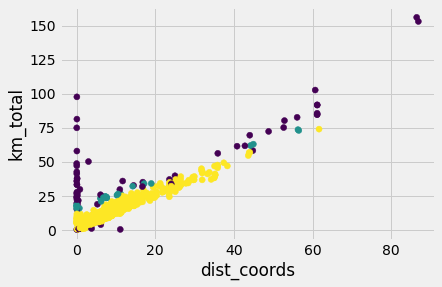

In [414]:
plt.scatter(filter_difs_rs['dist_coords'], filter_difs_rs['km_total'], c=model_hdb.labels_)
plt.xlabel('dist_coords') 
plt.ylabel('km_total') 
# pontos fora da reta como outliers

In [415]:
# Análise dos gráficos abaixo:
# Pontos muito discrepantes foram realmente detectados como outliers. Mas também mostra que pontos dentro da reta, 
# que à primeira vista não seriam vistos como outliers, podem sim apresentar alguma inconformidade e devem ser verificados.

Text(0, 0.5, 'valor_corrida')

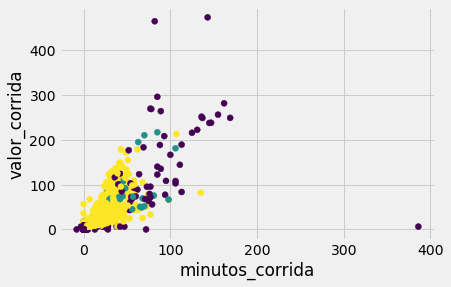

In [416]:
plt.scatter(df_merged['minutos_corrida'], df_merged['valor_corrida'], c=df_merged['HDBSCAN_labels'])
plt.xlabel('minutos_corrida') 
plt.ylabel('valor_corrida') 

Text(0, 0.5, 'km_total')

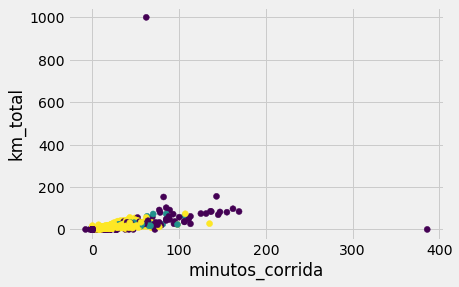

In [417]:
plt.scatter(df_merged['minutos_corrida'], df_merged['km_total'], c=df_merged['HDBSCAN_labels'])
plt.xlabel('minutos_corrida') 
plt.ylabel('km_total') 

Text(0, 0.5, 'valor_corrida')

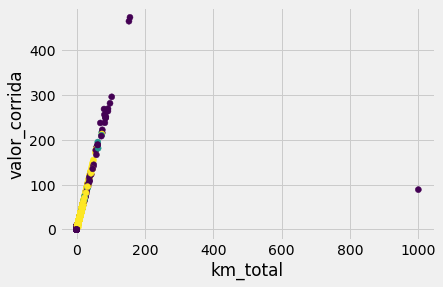

In [418]:
plt.scatter(df_merged['km_total'], df_merged['valor_corrida'], c=df_merged['HDBSCAN_labels'])
plt.xlabel('km_total') 
plt.ylabel('valor_corrida') 

In [266]:
# Exportar df_merged para excel

In [267]:
import openpyxl

In [268]:
df_merged.to_excel('df_merged_final.xlsx', index=False)